In [160]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns
import locale as lc

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we to read in the data
df_original = pd.read_csv(r'C:\Users\desm1\Downloads\movies.csv')
df = df_original


In [125]:
#have a quick look
df.head()

,name,rating,genre,year,released_date,released_place,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",United States,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",United States,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",United States,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",United States,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",United States,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [119]:
# check for missing data
# loop through the data to see if there's anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [120]:
# check data Types for all columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<AxesSubplot:>

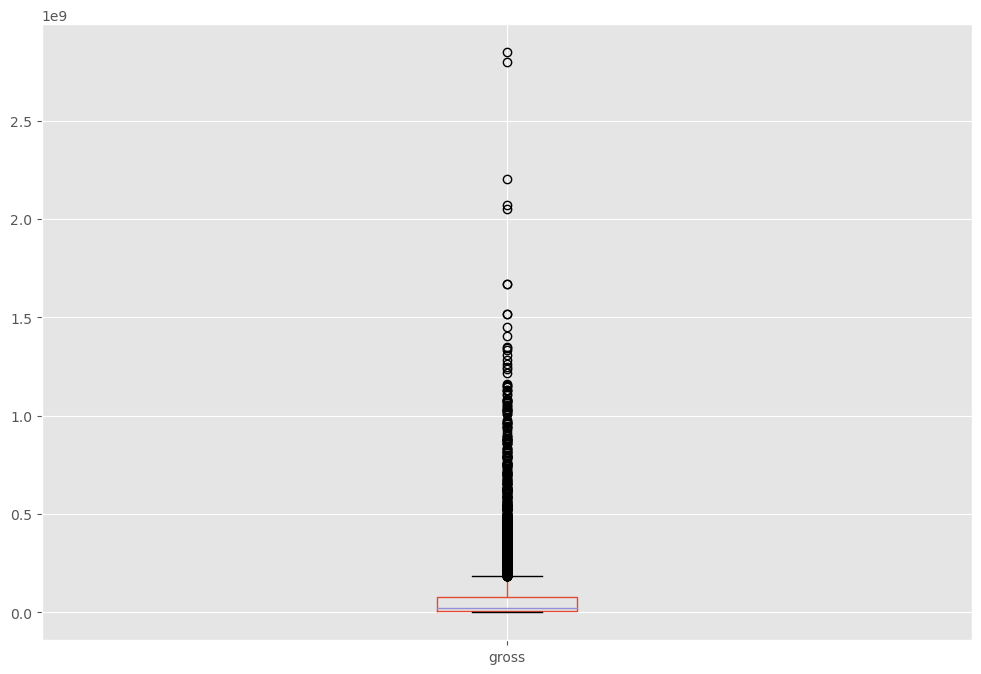

In [161]:
# check for Outliers

df.boxplot(column=['gross'])

In [162]:
# -----------------------------------------------------------------------
# --------------------------- Data Cleaning -----------------------------
# -----------------------------------------------------------------------



y = df['released'].str.replace(")","").str.split("(",expand=True).rename(columns={0:'released_date',1:'released_place'})
df.insert(4,'released_date',y['released_date'])
df.insert(5,'released_place',y['released_place'])
df.drop(['released'],axis=1,inplace=True)

# Convert DateTime
df['released_date'] = df['released_date'].astype(str).astype('datetime64')

df.info()


C:\Users\desm1\AppData\Local\Temp\ipykernel_32464\1046355389.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y = df['released'].str.replace(")","").str.split("(",expand=True).rename(columns={0:'released_date',1:'released_place'})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            7668 non-null   object        
 1   rating          7591 non-null   object        
 2   genre           7668 non-null   object        
 3   year            7668 non-null   int64         
 4   released_date   7666 non-null   datetime64[ns]
 5   released_place  7666 non-null   object        
 6   score           7665 non-null   float64       
 7   votes           7665 non-null   float64       
 8   director        7668 non-null   object        
 9   writer          7665 non-null   object        
 10  star            7667 non-null   object        
 11  country         7665 non-null   object        
 12  budget          5497 non-null   float64       
 13  gross           7479 non-null   float64       
 14  company         7651 non-null   object        
 15  runt

In [163]:
# remove duplicates
df.drop_duplicates()

#Fill nulls and na
columns_1 = ['rating','company','writer','country','released_place','star']
for i in columns_1:
    df[i].fillna("Others",inplace=True)

columns_2 = ['runtime','score','votes']
for j in columns_2:
    df[j].fillna(0,inplace=True) 
columns_3 = ['budget','gross']
for k in columns_3:
    df[k].fillna(round(np.mean(df[k])),inplace=True)



df['released_date'].fillna('0000-00-00',inplace=True)
df.isna().sum().sort_values(ascending=False)[:-4].reset_index().rename(columns={"index":"columns",0:"Null_Values"})



,columns,Null_Values
0,name,0
1,rating,0
2,genre,0
3,year,0
4,released_date,0
5,released_place,0
6,score,0
7,votes,0
8,director,0
9,writer,0


In [164]:
# Sort data by gross
df.sort_values(by=['gross'], inplace=False, ascending=False)



,name,rating,genre,year,released_date,released_place,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18 00:00:00,United States,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26 00:00:00,United States,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,1997-12-19 00:00:00,United States,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18 00:00:00,United States,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27 00:00:00,United States,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,2001-02-09 00:00:00,United States,6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876.0,1.400000e+03,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,Others,Comedy,2019,2019-01-11 00:00:00,United States,5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876.0,7.900000e+02,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,2020-06-26 00:00:00,United States,5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876.0,6.820000e+02,Roxwell Films,93.0
2417,Madadayo,Others,Drama,1993,1993-04-17 00:00:00,Japan,7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000.0,5.960000e+02,DENTSU Music And Entertainment,134.0


In [157]:
df.shape

(7668, 17)

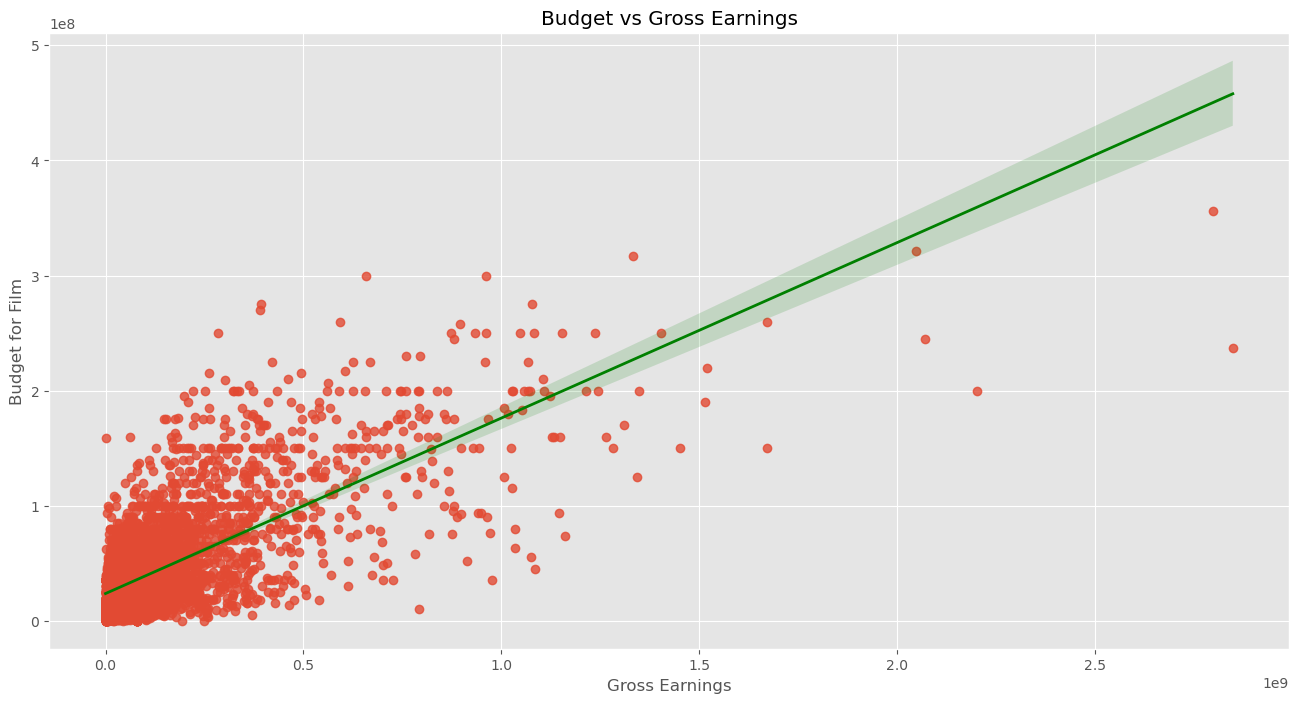

In [167]:
# plot relationship between gross and budget
plt.figure(figsize=(16,8))
sns.regplot(x="gross", y="budget", data=df,line_kws={'lw':2,'color':'green'})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()



In [14]:
# Compute correlation Matrix between all numeric columns: Pearson 
df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [16]:
# Compute correlation Matrix between all numeric columns: Kendall 
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


In [17]:
# Compute correlation Matrix between all numeric columns: Spearman 
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


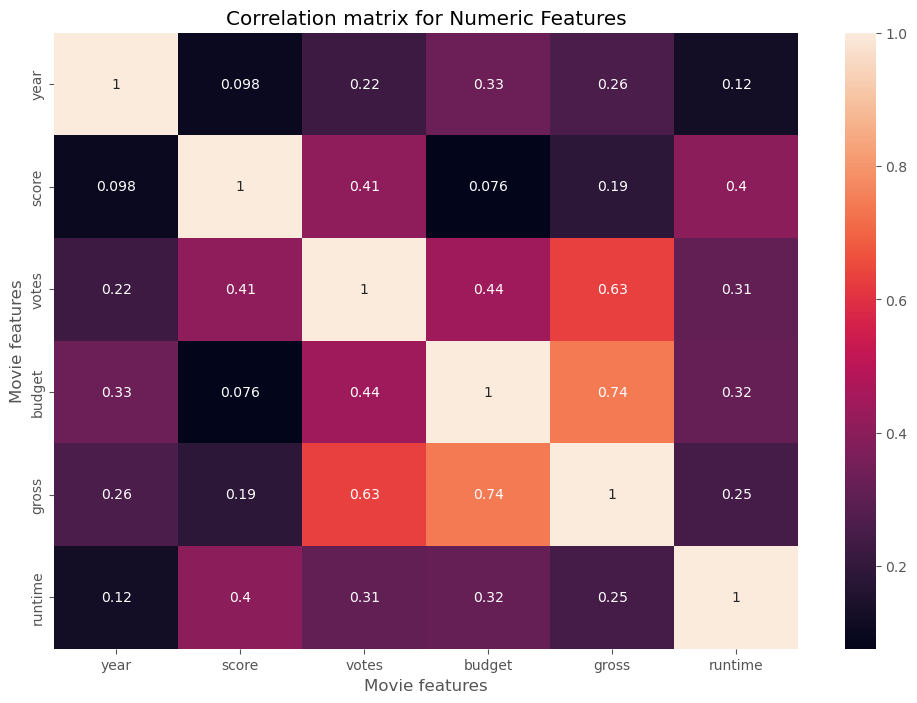

In [18]:
#Correlation matrix heatmap

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()



In [19]:
# factorize - to assign a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143938,0.036367,0.965761,0.959015,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.277488,0.947324,0.591667,0.048955
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,0.012595,0.099972,0.085520,0.103623,0.093116,0.000494,0.193353,0.158582,-0.028035,0.032741
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.073008,0.038616,0.009566,0.001462
year,0.965761,0.156713,0.037184,1.000000,0.993190,-0.044981,0.312401,0.770497,0.824770,0.756400,0.140216,0.300621,0.980873,0.601571,0.050647
released,0.959015,0.146606,0.035940,0.993190,1.000000,-0.045761,0.299905,0.770876,0.819617,0.754468,0.148468,0.285691,0.976423,0.607954,0.048235
score,-0.046733,0.012595,-0.002437,-0.044981,-0.045761,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.012642,-0.047041,-0.028432,0.026436
votes,0.287776,0.099972,0.023285,0.312401,0.299905,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.398519,0.286180,0.008900,0.106024
director,0.745905,0.085520,0.047288,0.770497,0.770876,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.106617,0.750911,0.552258,-0.011070
writer,0.805211,0.103623,0.033688,0.824770,0.819617,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.187238,0.805576,0.546151,0.032264
star,0.731565,0.093116,0.038649,0.756400,0.754468,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.107991,0.735680,0.527116,0.035392


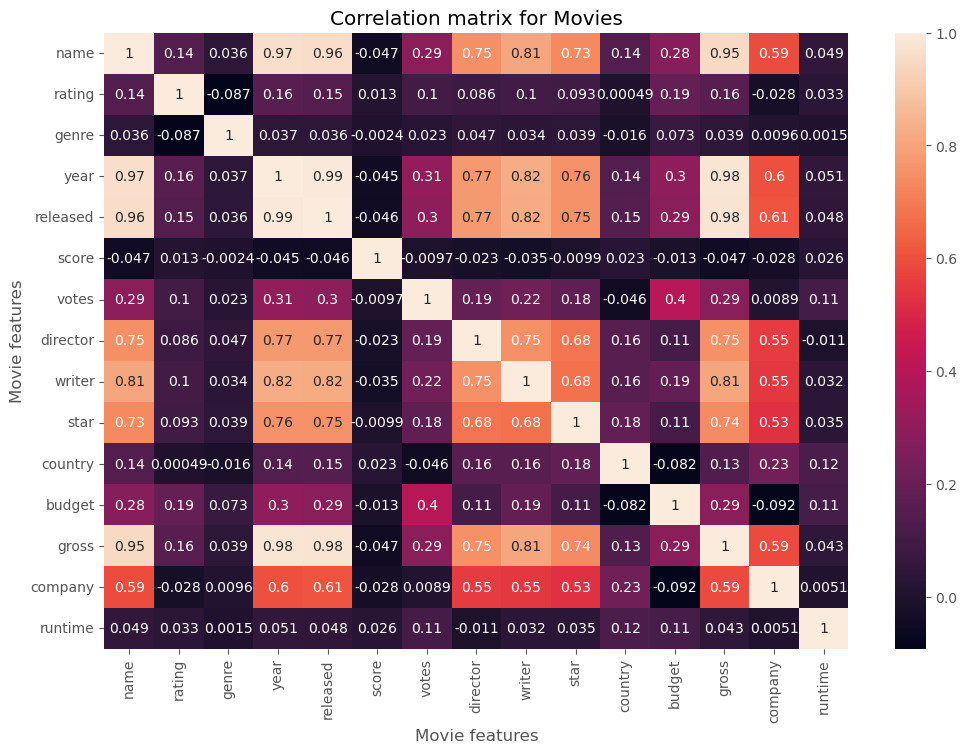

In [20]:
# heatmap for factorized matrix

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [94]:
# unstack pairs
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

In [107]:
#sort pairs and filter the ones with correlation > 0.5 (deemed as high correlation)
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5) & (abs(sorted_pairs) < 1)]

print("Strong Pairs >0.5:")
print(strong_pairs)

strong_pairs.to_csv('Output.csv')

Strong Pairs >0.5:
star      company     0.527363
company   star        0.527363
writer    company     0.547126
company   writer      0.547126
director  company     0.552420
company   director    0.552420
          gross       0.587727
gross     company     0.587727
company   name        0.591834
name      company     0.591834
company   year        0.601720
year      company     0.601720
company   released    0.607607
released  company     0.607607
star      writer      0.676284
writer    star        0.676284
star      director    0.682358
director  star        0.682358
name      star        0.731509
star      name        0.731509
          gross       0.735612
gross     star        0.735612
name      director    0.745905
director  name        0.745905
writer    director    0.748875
director  writer      0.748875
          gross       0.750911
gross     director    0.750911
star      released    0.755408
released  star        0.755408
year      star        0.756341
star      year      

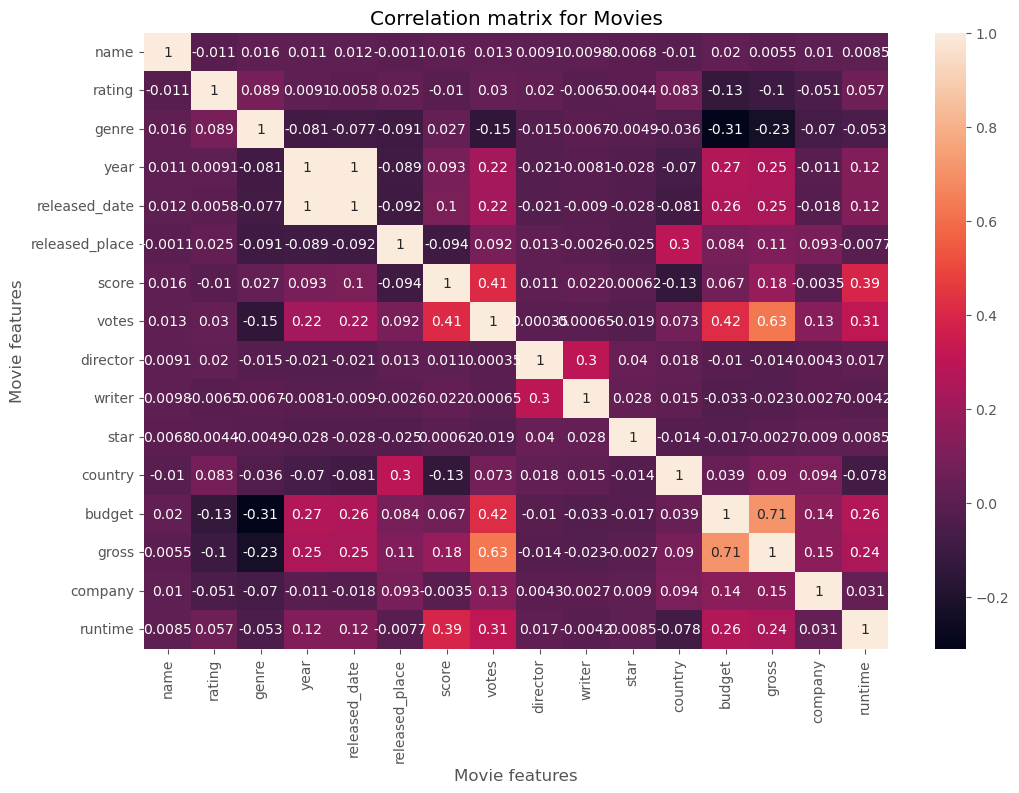

In [171]:
# Extended Correlation Matrix Heatmap
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized


correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [ ]:
#Findings:

# Was expecting gross and budget to have the strongest correlation, as implied by the visualizations above.
# However, it turns out that gross has a much stronger correlation with writer, director, star! 


In [65]:
# -----------------------------------------------------------------------
# ---------------------- Data Exploratory Analysis ----------------------
# -----------------------------------------------------------------------

# Look at the top 15 compaies by gross revenue (table)
CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted


company
2319    56491421806
2281    52514188890
731     43008941346
1812    40493607415
2253    40257053857
2316    36327887792
1713    19883797684
1606    15065592411
887     11873612858
2232    11795832638
889     11635441081
1637     9230230105
2147     8373718838
1856     7886344526
1109     7443502667
Name: gross, dtype: int64

Text(0.5, 1.0, 'Top 5 Highest Grossing Movies')

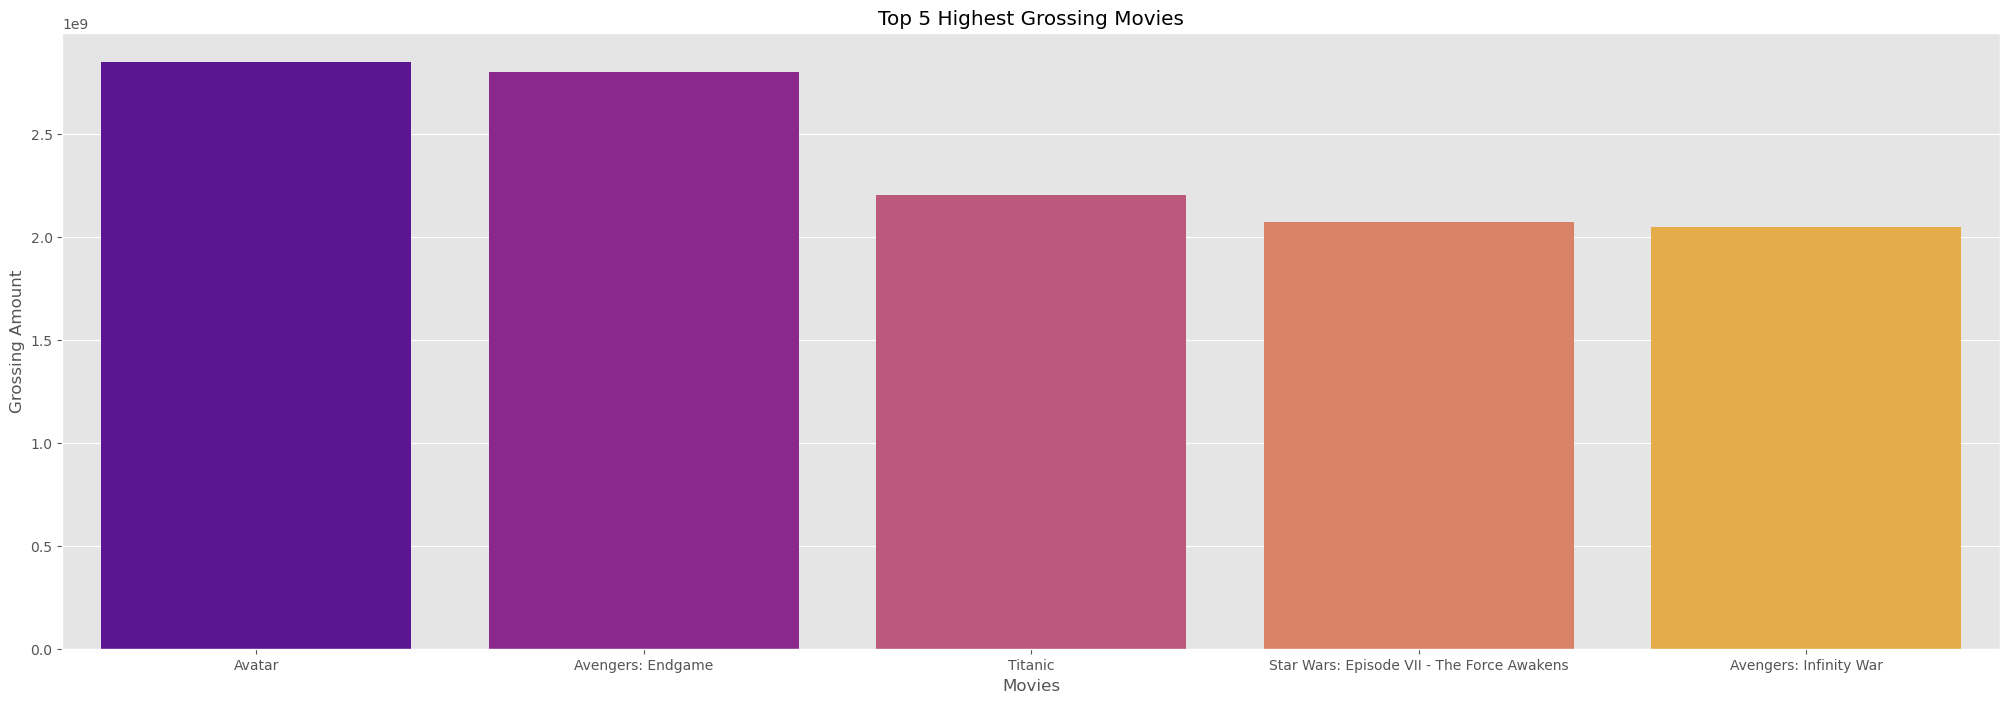

In [132]:
#1. The top 5 highest grossing movies in the movie industry? 

# A bar chart would be the most appropriate visualization for this data. 
#The x-axis would be the top 5 highest grossing movies and the y-axis would be the grossing amounts in monetary units. 
#The bars would be different colors to make it more visually appealing.
plt.figure(figsize=(25,8))
sns.barplot(x='name',y='gross',data=df.sort_values(by='gross',ascending=False).head(),palette='plasma')
plt.xlabel('Movies')
plt.ylabel('Grossing Amount')
plt.title('Top 5 Highest Grossing Movies')




Text(0.5, 1.0, 'The Most Popular Genres Of Movies')

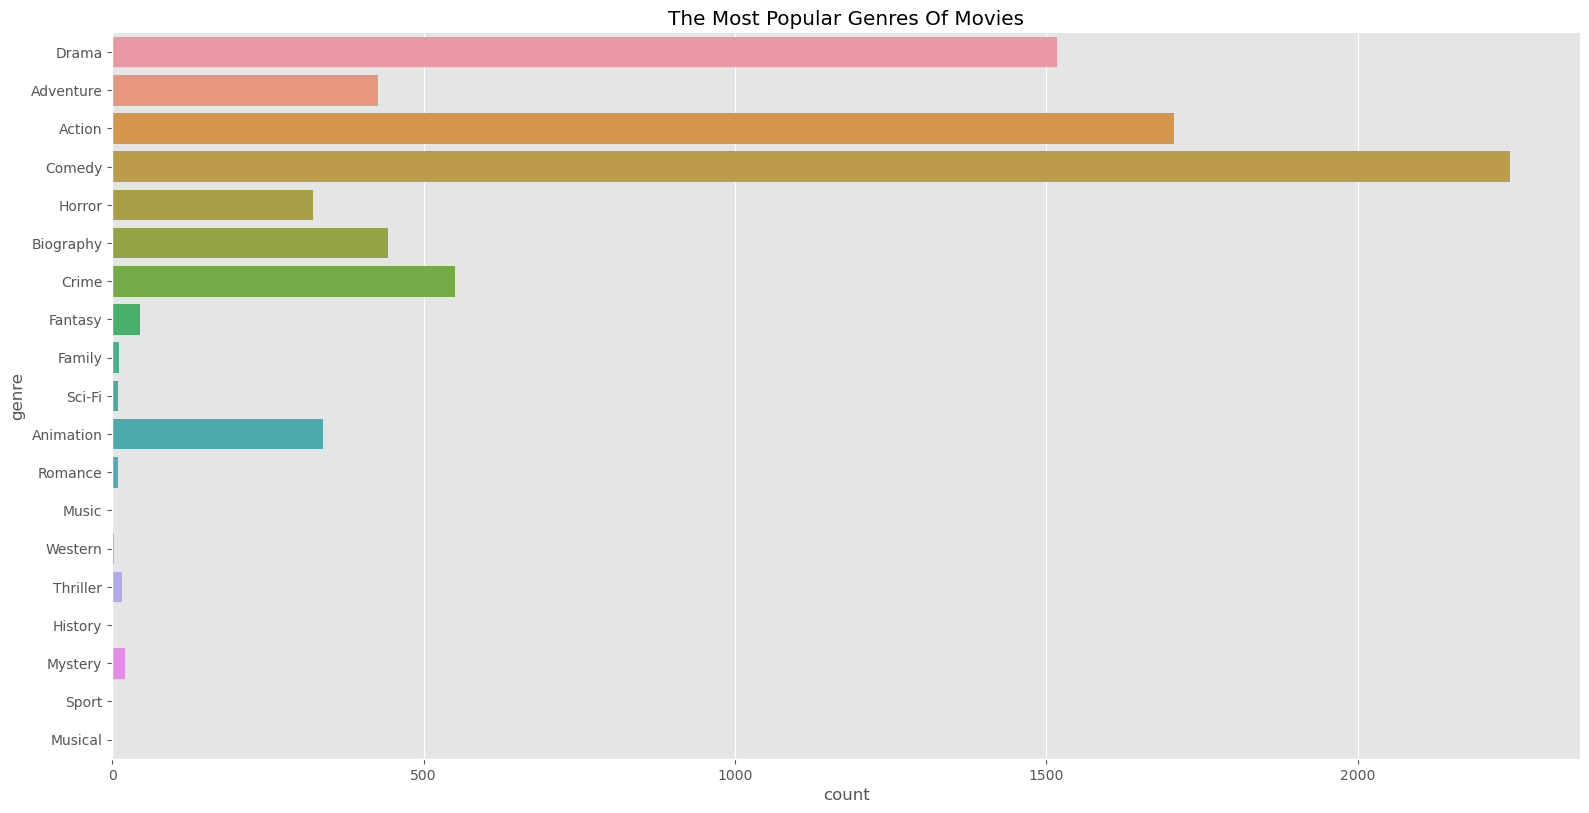

In [133]:
#2. The most popular genres of movies? 

# Plot bar chart with total movies of each genre
sns.catplot(y='genre', kind='count', data=df,height=8, aspect=2);
plt.title('The Most Popular Genres Of Movies')

Text(0.5, 1.0, 'Top 10 Companies In Movies Industry')

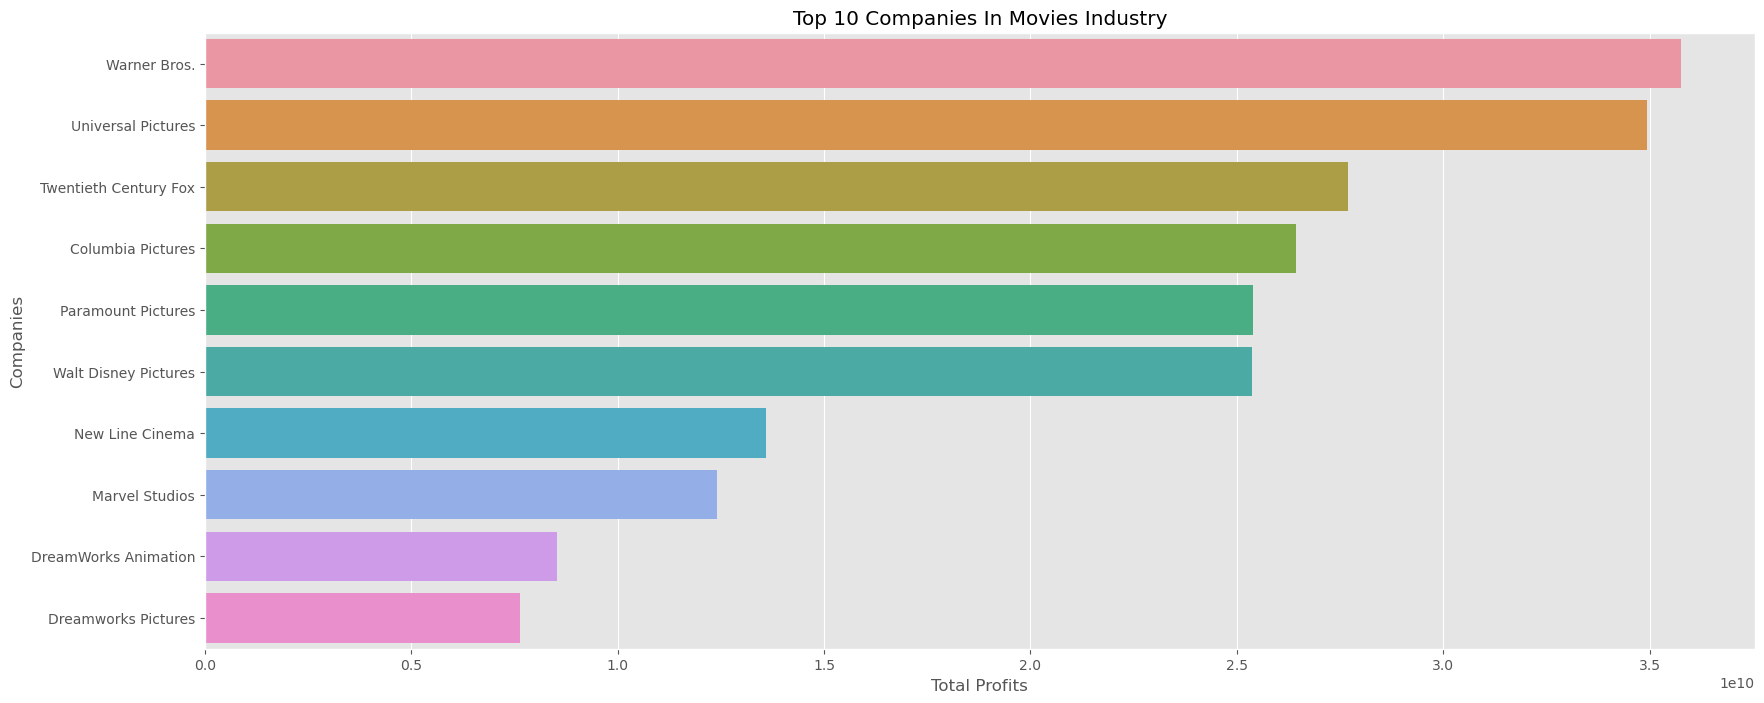

In [151]:
#What are the most successful companies in movie industry? 
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted


data = df.groupby(['company'])['profit'].agg({'sum'}).reset_index().rename(columns={'sum':'total_profit'}).sort_values('total_profit',ascending =False)[:10]
plt.figure(figsize=(20,8))
sns.barplot(y='company',x='total_profit',data=data)
plt.ylabel('Companies')
plt.xlabel('Total Profits')
plt.title('Top 10 Companies In Movies Industry')



Text(0.5, 1.0, 'Average Budget Of Each Genre')

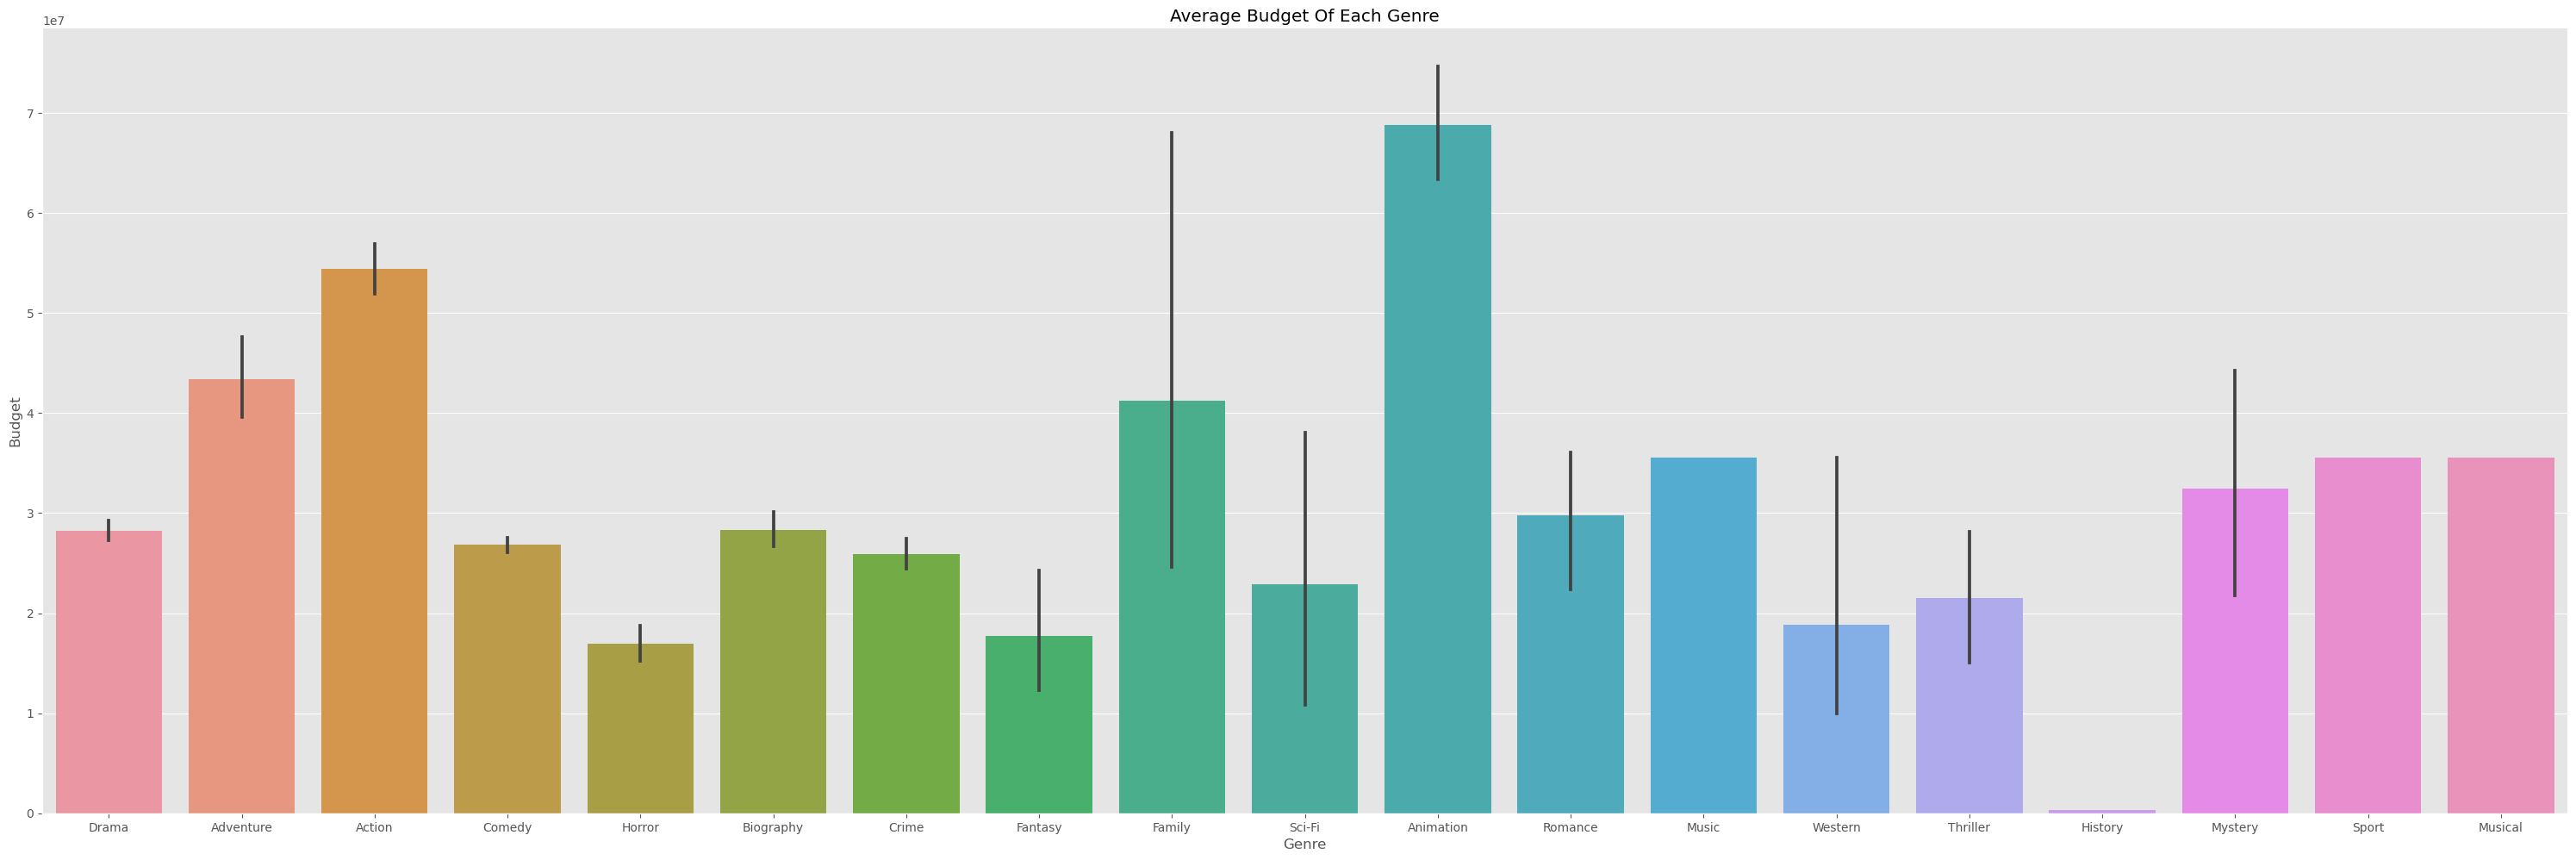

In [134]:
#The average budget of Each genre? 
# Plot bar chart with average budget of each genre
sns.catplot(x='genre', y='budget', kind='bar', data=df, height=10, aspect=3)
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.title('Average Budget Of Each Genre')


Text(0.5, 1.0, 'Average Gross Of Each Genre')

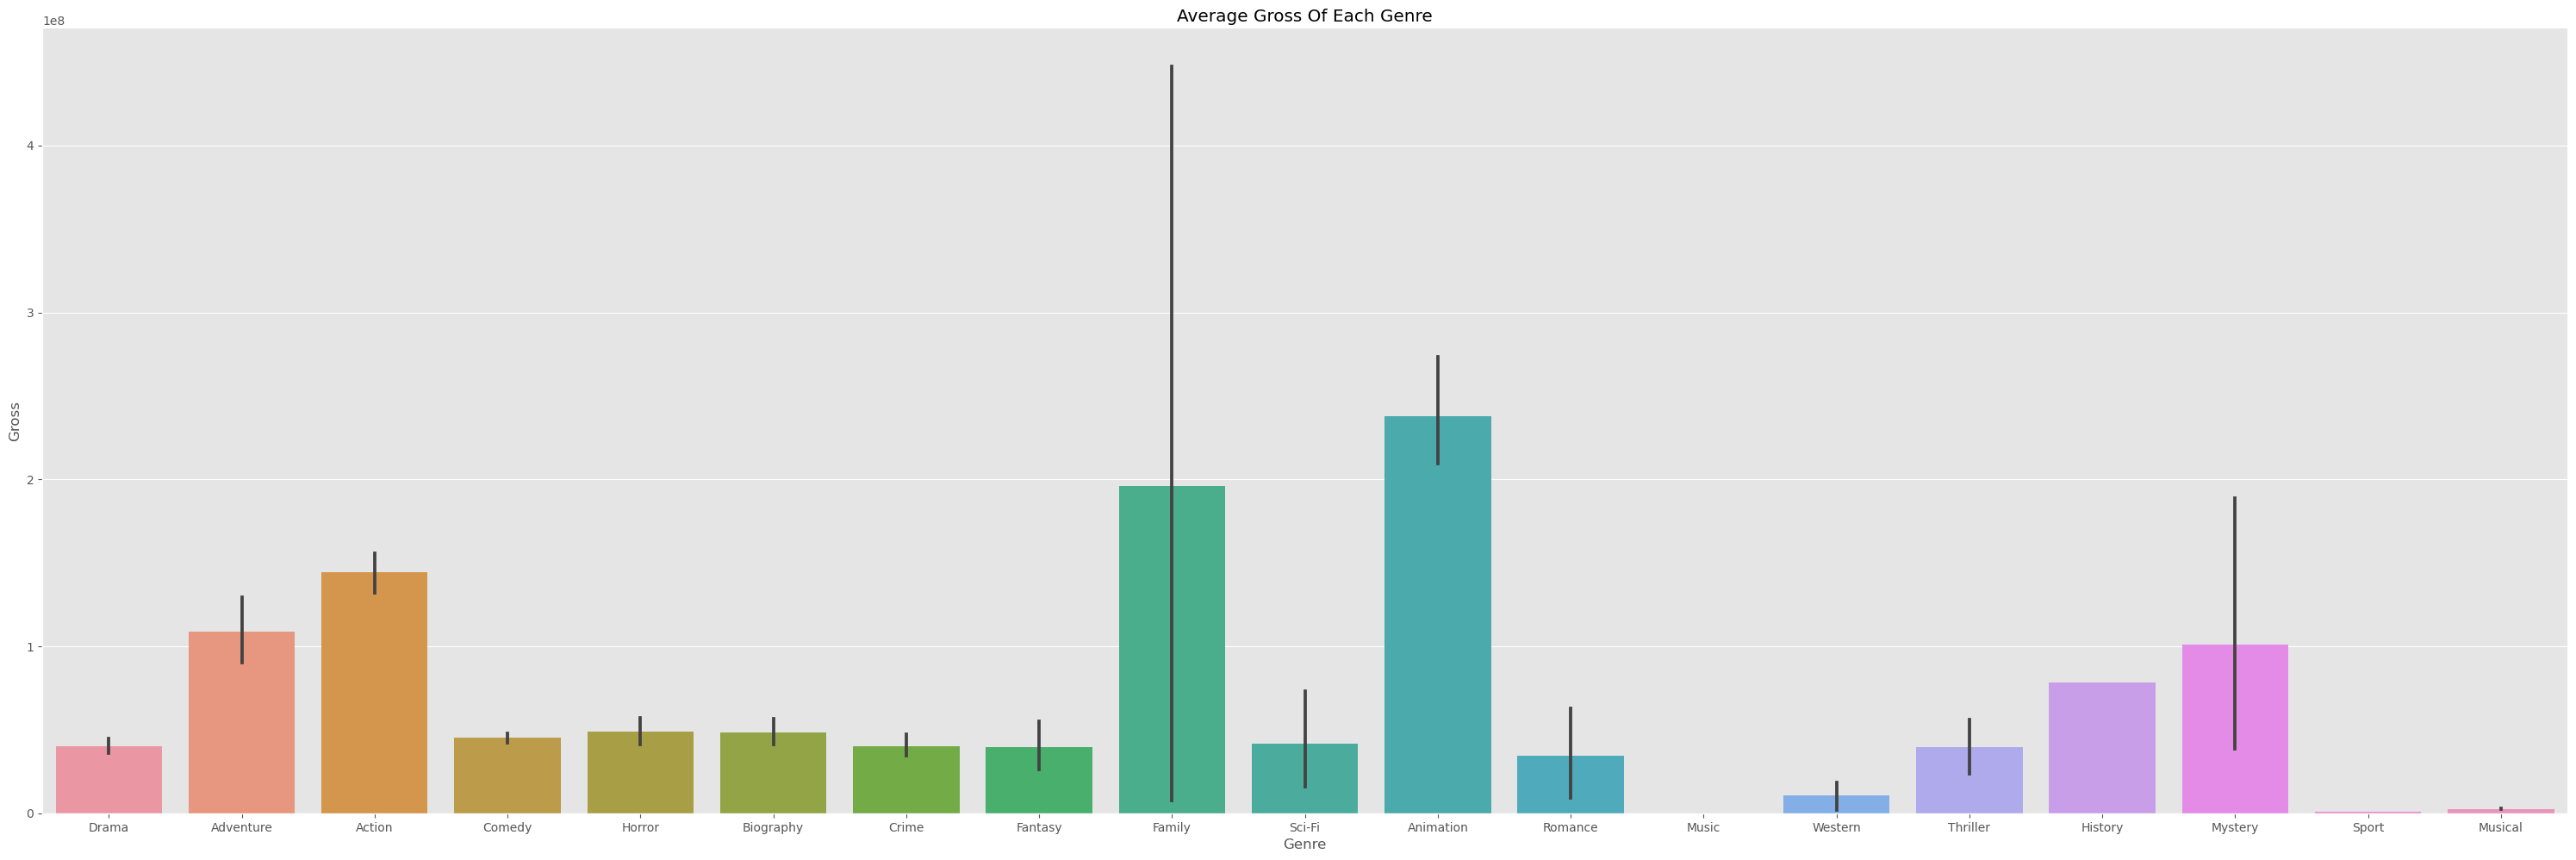

In [135]:
# The average gross of each genre? 
# Plot bar chart with average budget of each genre
sns.catplot(x='genre', y='gross', kind='bar', data=df, height=10, aspect=3)
plt.xlabel('Genre')
plt.ylabel('Gross')
plt.title('Average Gross Of Each Genre')

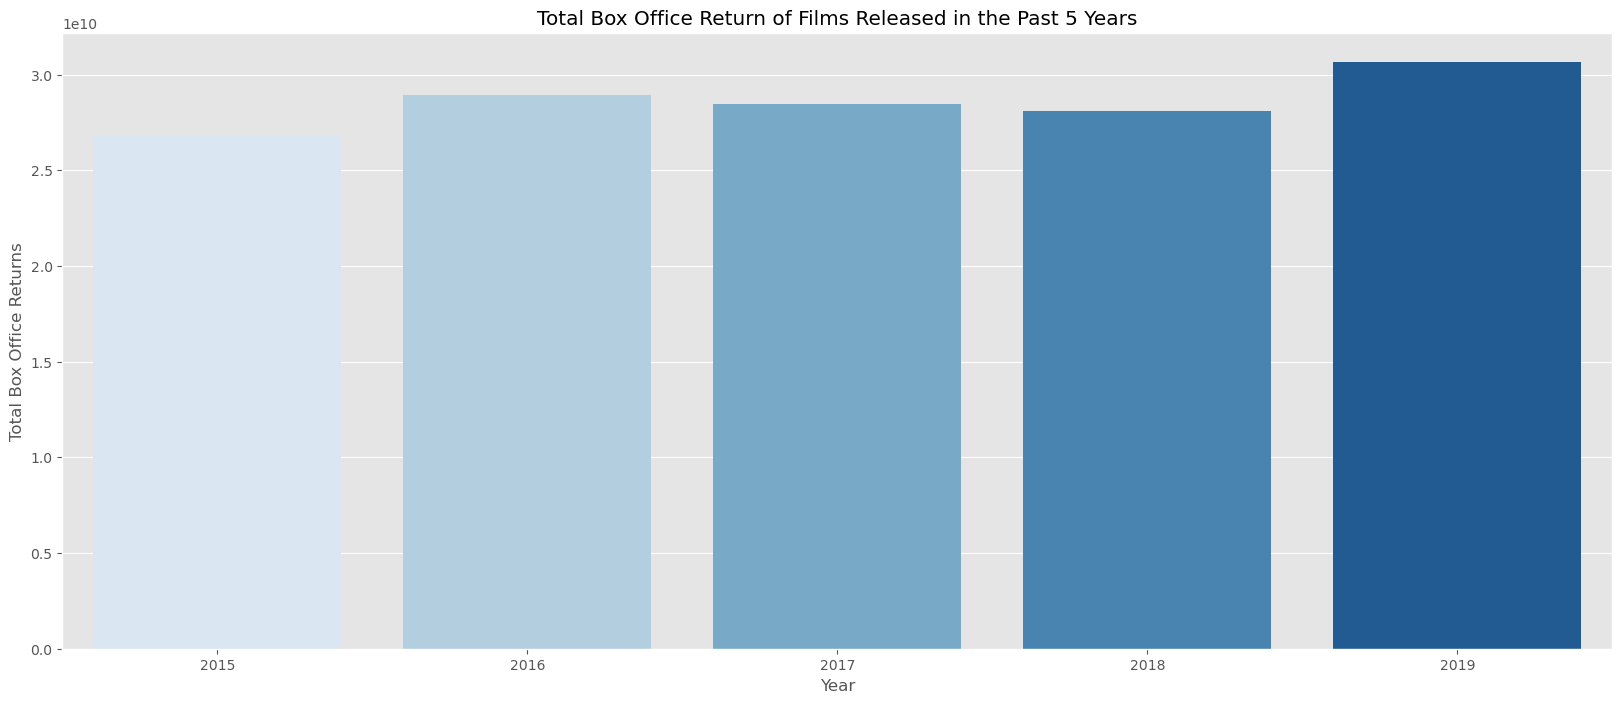

In [136]:
#The total box office return of films released in the past 5 years? 
data = df.groupby('year')['gross'].agg({'sum'}).sort_values(by='year',ascending = False)[1:6].reset_index().rename(columns={'sum':'total_box_office_returns'})


plt.figure(figsize=(20,8))
sns.barplot(x="year", y="total_box_office_returns", data=data, palette="Blues")
plt.xlabel('Year')
plt.ylabel('Total Box Office Returns')
plt.title("Total Box Office Return of Films Released in the Past 5 Years")
plt.show()

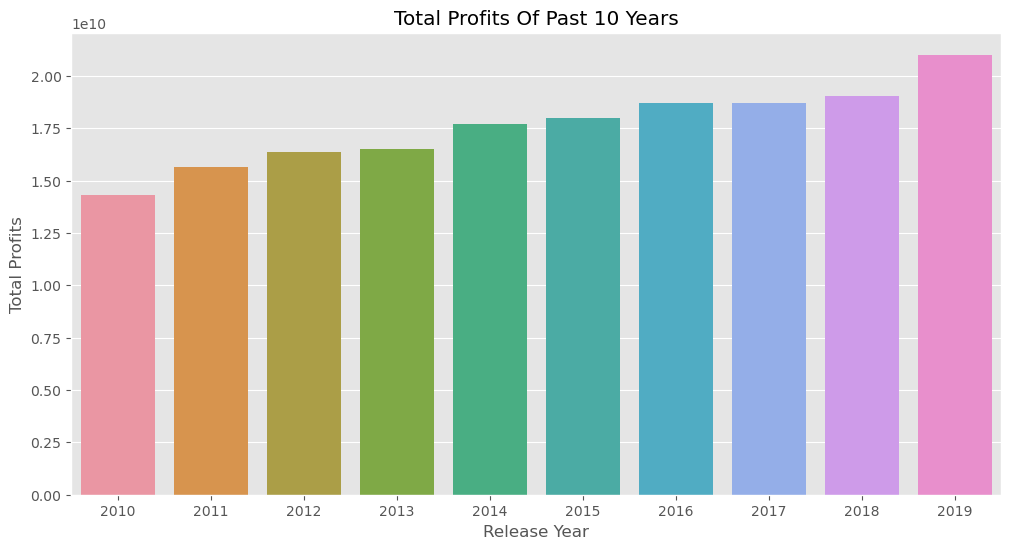

In [141]:
# Total profits of past 10 years in movie industry 
# Create new column: Profit = Total_Sales-Total_Expenses
df['profit'] = df['gross']-df['budget']

df_profit = df.groupby('year')['profit'].sum().reset_index().sort_values(by ='year',ascending=False).rename(columns={'profit':'total_profits'})[1:11]

#  Total_profits of Past 10 Years. 
plt.figure(figsize=(12,6))
sns.barplot(x='year', y='total_profits', data=df_profit)
plt.xlabel('Release Year')
plt.ylabel('Total Profits')
plt.title('Total Profits Of Past 10 Years')
plt.show()

Text(0.5, 1.0, 'Top 10 Highest Viewership Movies')

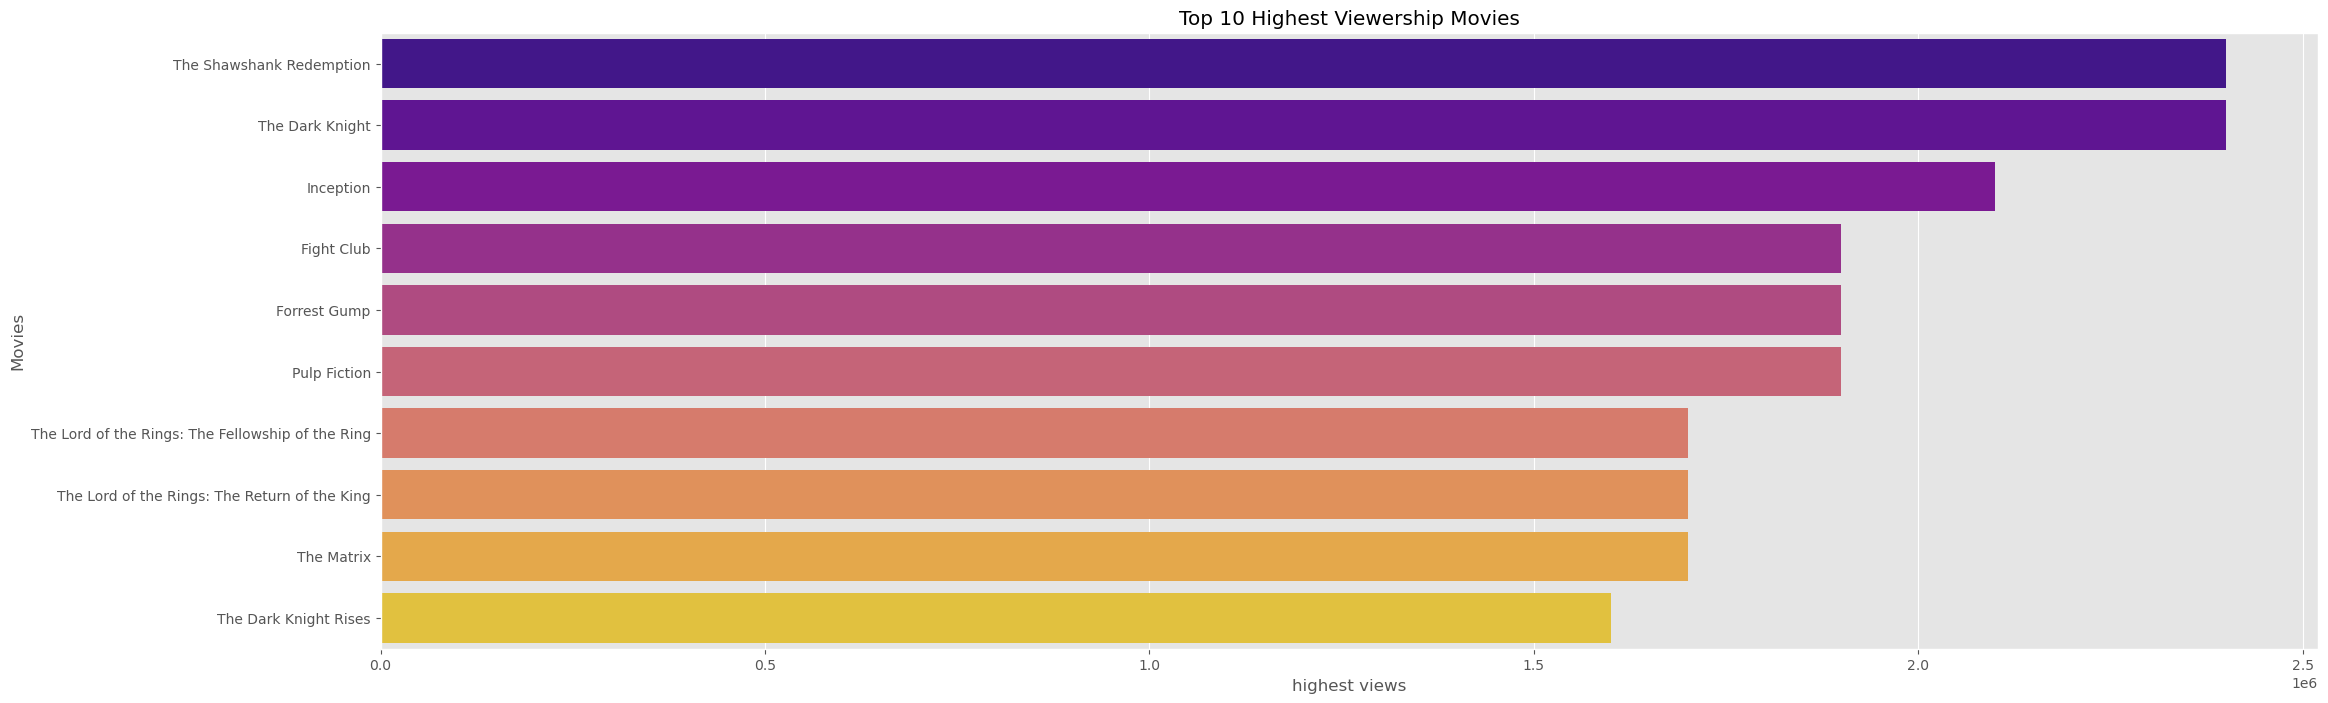

In [142]:
# Top 10 movies with the highest viewership?
plt.figure(figsize=(25,8))
sns.barplot(y='name',x='votes',data=df.sort_values(by='votes',ascending=False).head(10),palette='plasma')
plt.ylabel('Movies')
plt.xlabel('highest views')
plt.title('Top 10 Highest Viewership Movies')

Text(0.5, 1.0, 'Top 10 Directors In Movie Industry')

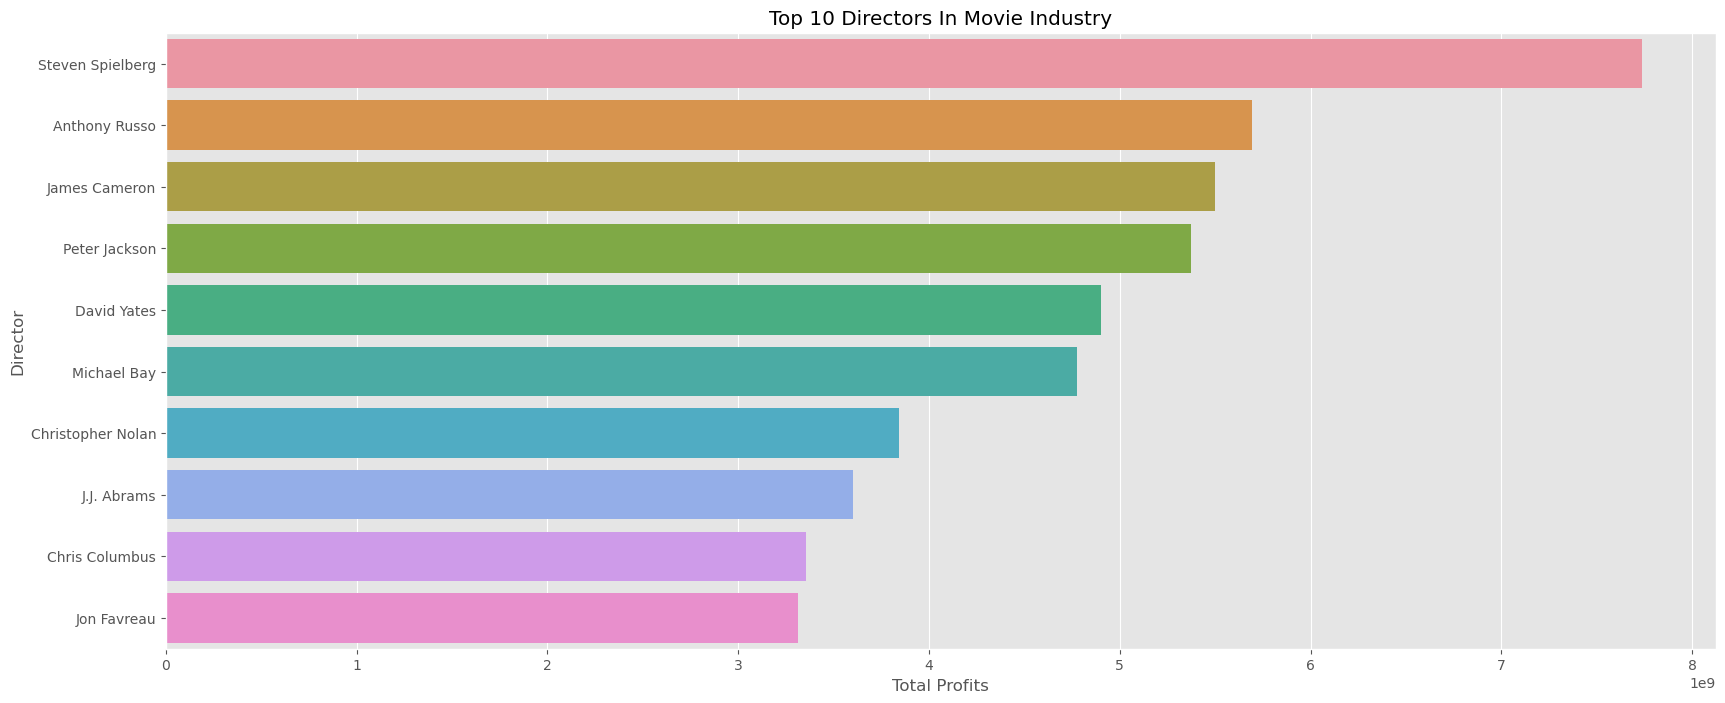

In [144]:
# The most successful directors by profit?
data = df.groupby('director')['profit'].sum().reset_index().rename(columns={'profit':'total_profit'}).sort_values(by='total_profit',ascending=False)[:10]
plt.figure(figsize=(20,8))
sns.barplot(y='director',x='total_profit',data=data)
plt.ylabel('Director')
plt.xlabel('Total Profits')
plt.title('Top 10 Directors In Movie Industry')



Text(0.5, 1.0, 'List Of Genres Have The highest Viewership')

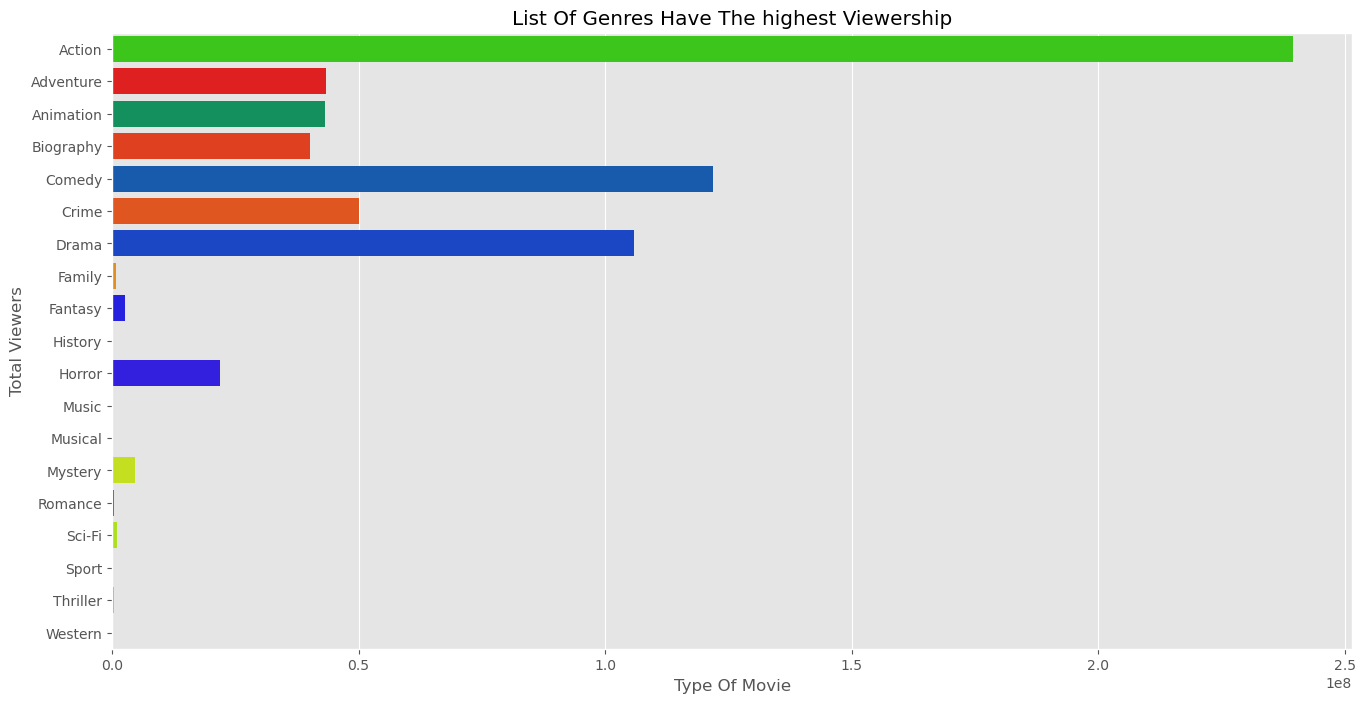

In [146]:
# What genres have the highest viewership?
data = df.groupby('genre')['votes'].agg({'sum'}).reset_index().rename(columns={'sum':'total_views'})
plt.figure(figsize=(16,8))
sns.barplot(x='total_views',y='genre',data=data,palette='prism')
plt.xlabel('Type Of Movie')
plt.ylabel('Total Viewers')
plt.title('List Of Genres Have The highest Viewership')




Text(0.5, 1.0, 'Top 5 Countries produced The Total Number Of Films')

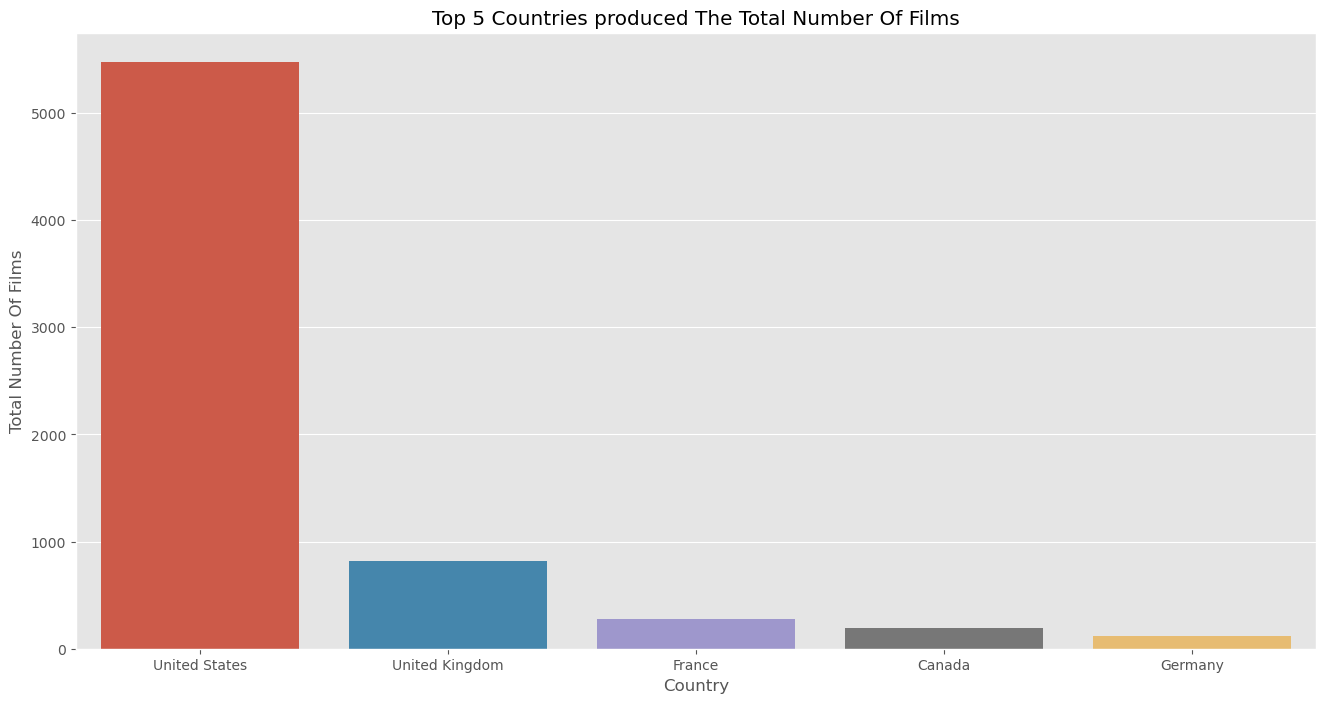

In [147]:
# Which countries produce the most films?
data = df.groupby('country')['name'].agg({'count'}).reset_index().rename(columns={'count':'total_number_of_films'}).sort_values(by='total_number_of_films',ascending = False)[:5]
plt.figure(figsize=(16,8))
sns.barplot(x='country',y='total_number_of_films',data=data)
plt.xlabel('Country')
plt.ylabel('Total Number Of Films')
plt.title('Top 5 Countries produced The Total Number Of Films')

Text(0.5, 1.0, 'Gross Collection of Movies Based On Ratings')

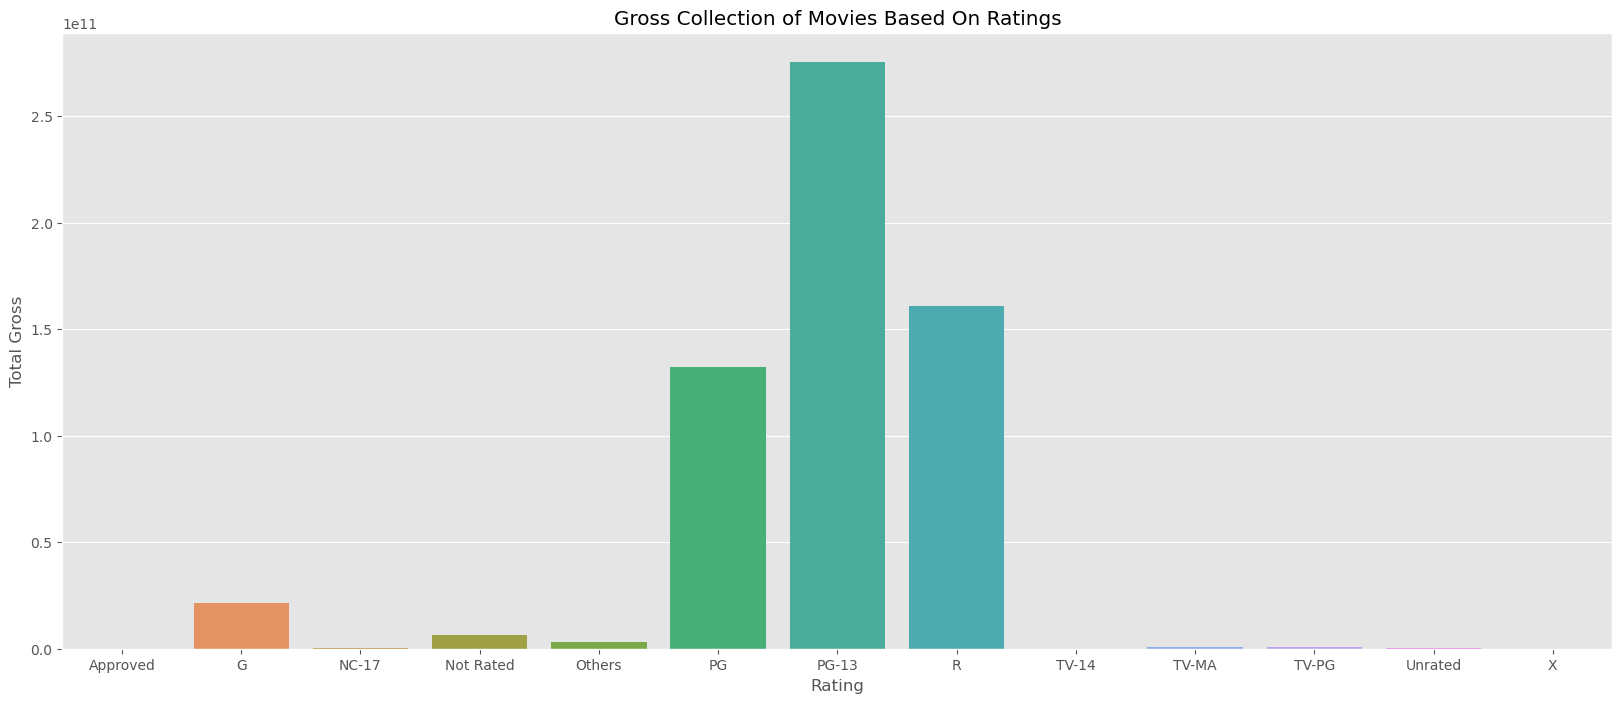

In [148]:
# What is the total and average gross collection of movies based on rating?
data = df.groupby('rating')['gross'].sum().reset_index().rename(columns={'gross':'total_gross'})
plt.figure(figsize=(20,8))
sns.barplot(x='rating',y='total_gross',data=data)
plt.xlabel('Rating')
plt.ylabel('Total Gross')
plt.title('Gross Collection of Movies Based On Ratings')


Text(0.5, 1.0, 'Average Gross Collection of Movies Based On Ratings')

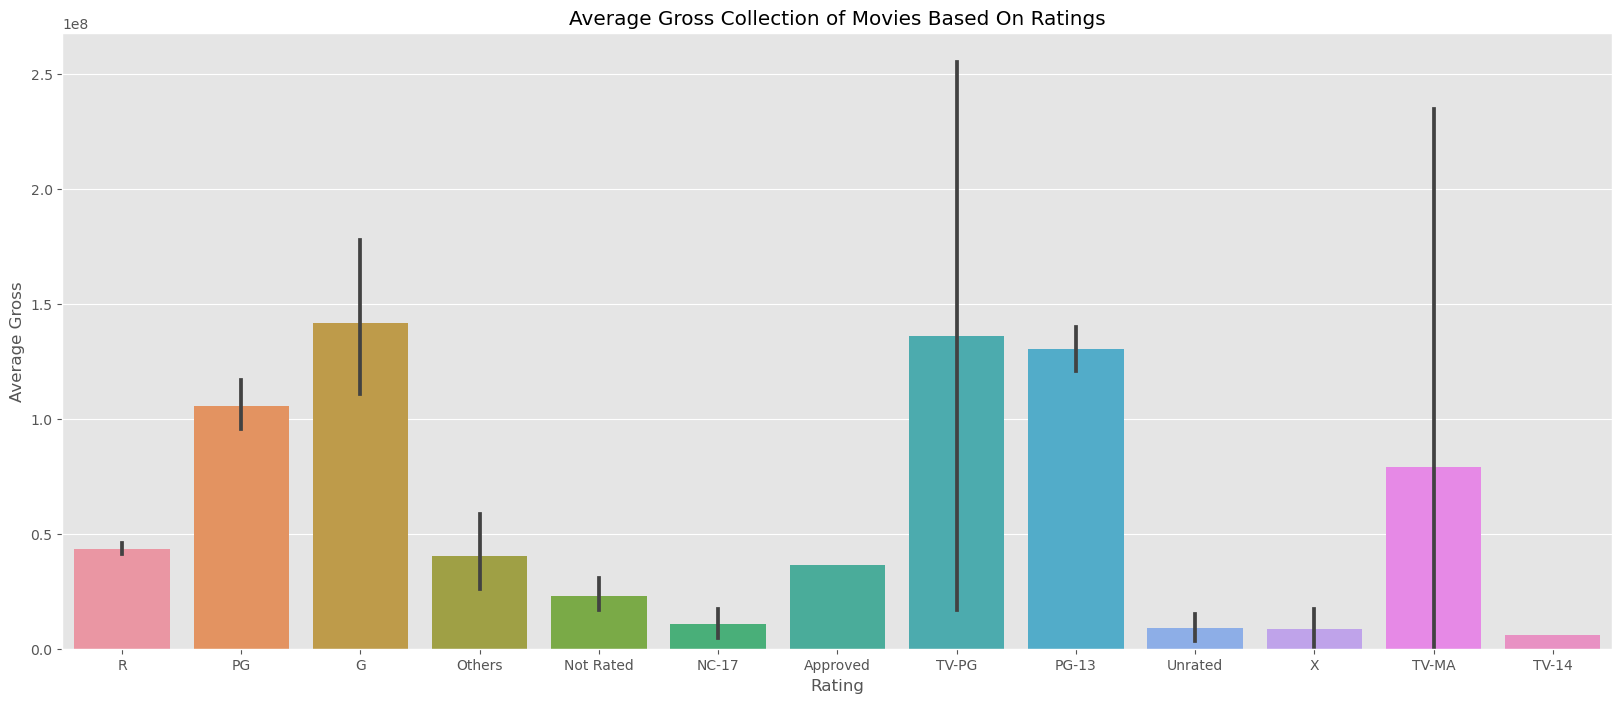

In [149]:
# Average Gross Collections Of Movies Based On Ratings. 
plt.figure(figsize=(20,8))
sns.barplot(x='rating',y='gross',data=df)
plt.xlabel('Rating')
plt.ylabel('Average Gross')
plt.title('Average Gross Collection of Movies Based On Ratings')

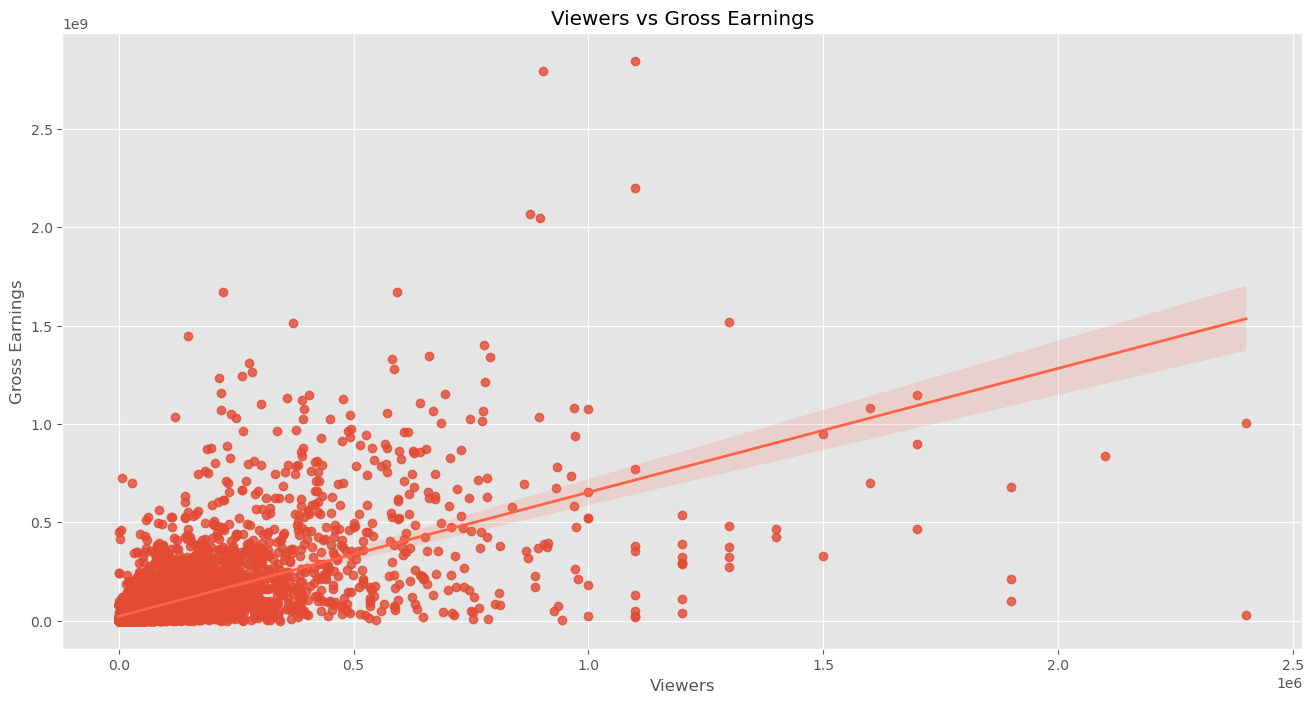

In [168]:
# Viewership vs Gross Earnings
plt.figure(figsize=(16,8))
sns.regplot(x="votes", y="gross", data=df,line_kws={'lw':2,'color':'tomato'})
plt.title('Viewers vs Gross Earnings')
plt.xlabel('Viewers')
plt.ylabel('Gross Earnings')
plt.show()

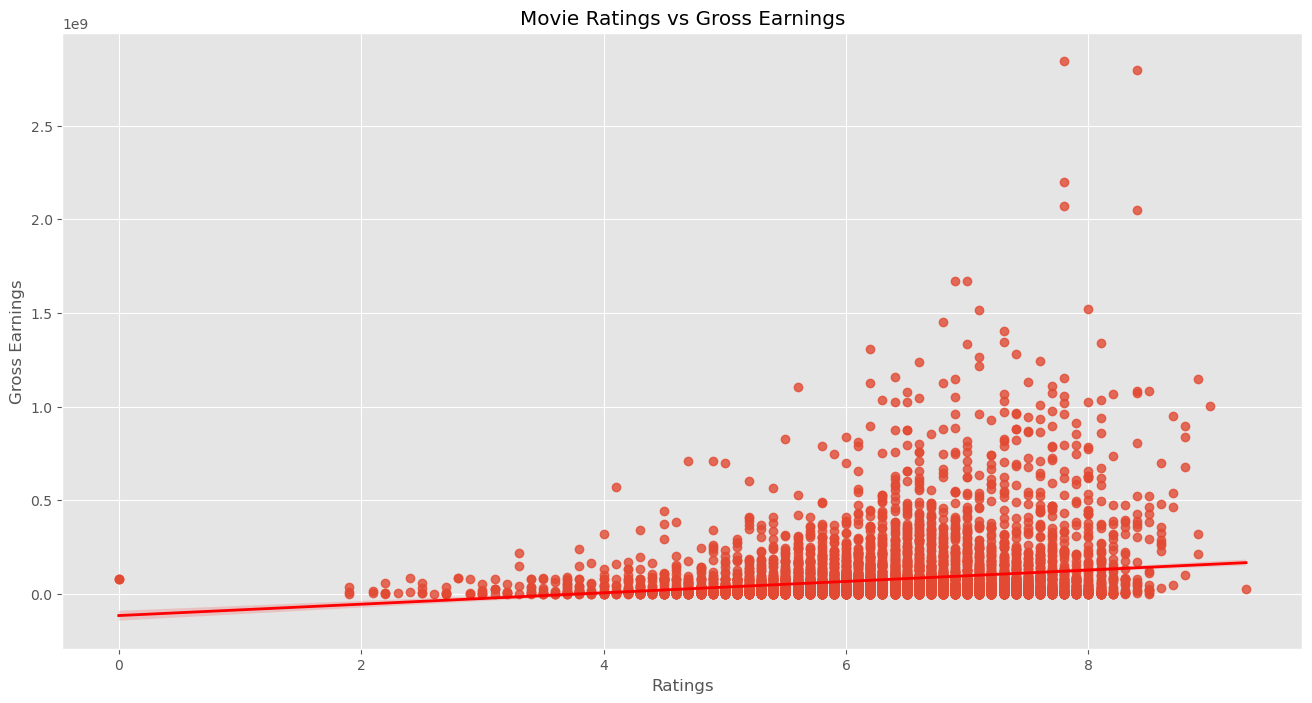

In [152]:
# Movie Rating vs Gross Earnings
plt.figure(figsize=(16,8))
sns.regplot(x="score", y="gross", data=df,line_kws={'lw':2,'color':'red'})
plt.title('Movie Ratings vs Gross Earnings')
plt.xlabel('Ratings')
plt.ylabel('Gross Earnings')
plt.show()